   Clustering (also known as cluster analysis) is a quintessential method of unsupervised machine learning. It's primarily used for dividing data up into groups (or clusters) based on shared criteria. By examining these clusters, different "families" can be deduced, families which provide a useful category to assign future data points to. For our purposes, clustering is used to divide up VBA macros based on their content, clusters to which we're able to assign varying levels of "maliciousnous" or "benignness." What follows is a demonstration of this process, with clusters formed based on two criteria: the literal words contained in a macro, and our proprietary InQuest features.

1. First, we must import everything we need. This includes numpy and pandas for opening and reading our dataframes, and our clustering algorithm. For our clustering algorithm, we use sklearn's kmeans classifier. We also load in our data into a panda's dataframe. Note that for the feature content, that data must be rescaled, as some of our features have a much wider range of values than others.

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
# dataframes
word_content_df = pd.read_csv(open("vba_dataframe.csv"),index_col=0)
iq_features_df  = pd.read_csv(open("features.csv"),index_col=0)
# scaler for rescaling features
scale = np.frompyfunc(lambda x, min, max: (x - min) / (max - min), 3, 1)
# rescaling
iq_features_df  = scale(iq_features_df, np.min(iq_features_df), np.max(iq_features_df)).astype(float)

word_content_df
iq_features_df

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
00027b55ffe7329faff173bc3046f579d176c5a79091bf21f31062e17bfec922,0.002783,0.002267,0.004858,0.026737,0.065727,0.006000,0.0,0.001196,0.057762,0.030349,...,0.004269,0.325301,0.287779,1.000000,0.000081,0.000681,1.000000,0.000111,0.003732,0.000000
00125528f276afcb74b5607e38b03edd41efafac58570589ef08b983cfa1231d,0.005080,0.002894,0.007684,0.080908,0.054478,0.013847,0.0,0.001999,0.070096,0.030604,...,0.015910,0.325301,0.220783,0.555556,0.000081,0.000311,0.000000,0.006417,0.003529,0.000000
001331fc0a289089ddeaab9ece4b1cf919f4852afe42b6ad64e672e0afccc588,0.000093,0.000020,0.000214,0.005152,0.044200,0.000396,0.0,0.000125,0.011733,0.022875,...,0.004269,0.325301,0.287779,1.000000,0.000081,0.000681,1.000000,0.000111,0.003257,0.000000
0014a559b4421bcc8f002e9a8b130f47ca04b7944ba89cf6e80524ed2912474c,0.000358,0.000248,0.000865,0.022699,0.045377,0.001582,0.0,0.000268,0.019254,0.016923,...,0.004269,0.325301,0.287779,1.000000,0.000081,0.000681,1.000000,0.000111,0.003461,0.000000
002d9d8f1664df94a985beff2388badaca96ae46bafa92df76eb19d18c154dcd,0.002659,0.002053,0.005771,0.013090,0.051768,0.007385,0.0,0.001928,0.017449,0.020865,...,0.011641,0.325301,0.248977,0.666667,0.000081,0.000562,0.666667,0.299292,0.004886,0.674087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fe553270c270427778b90f04ea305ef8af1fe422d77393c1dd9bdd0ecd2ba2c2,0.001673,0.001017,0.003509,0.012394,0.037977,0.012594,0.0,0.000803,0.023767,0.028003,...,0.010089,0.325301,0.230509,0.555556,0.000081,0.000451,0.333333,0.000111,0.007804,0.825046
ff02b95102524f4488bd7e91ca08c358638e89efb21042d614285aac38dacaff,0.055052,0.038199,0.079350,0.067957,0.072214,0.118555,0.0,0.014139,0.041215,0.023712,...,0.005045,0.325301,0.298225,1.000000,0.000081,0.000638,0.666667,0.000111,0.008143,0.000000
ff7db6253dcf00ad07510a02c9edec4e81e89beccb9a5653e15600642a9521e8,0.000662,0.000535,0.001064,0.016432,0.072290,0.000330,0.0,0.000411,0.015042,0.025130,...,0.019402,0.325301,0.212697,0.555556,0.000081,0.000291,0.000000,0.297522,0.008415,0.629053
ff97fae8be722a047e4acfa558a44f88ea1f34432b234dcb559faacbeb70362e,0.088216,0.090589,0.069364,0.017407,0.158303,0.019385,0.0,0.007212,0.036703,0.083164,...,0.017074,0.325301,0.236447,0.666667,0.000347,0.000920,0.333333,0.014716,0.997218,0.419282


2. We now initialize our kmeans model. For our purposes we have it divide the data into 5,000 clusters, but this can be changed. We then fit our model to the data.

In [37]:
word_content_kmeans = KMeans(n_clusters=5).fit(word_content_df)
iq_features_kmeans  = KMeans(n_clusters=5).fit(iq_features_df)

3. We are now able to get our data displayed

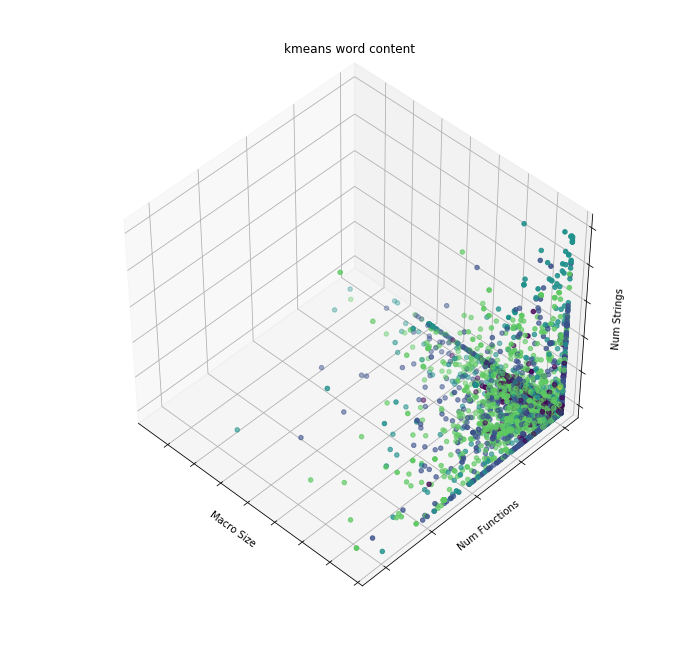

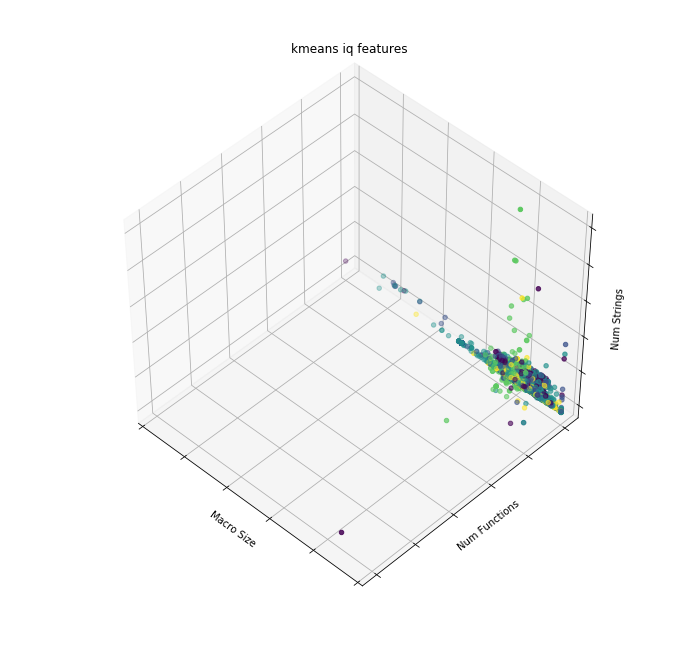

In [113]:
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

estimators = [('k_means_word_content', word_content_kmeans, word_content_df),
              ('k_means_iq_features', iq_features_kmeans, iq_features_df)]

fignum = 1
titles = ['kmeans word content','kmeans iq features']
for name, est, df in estimators:
    fig = plt.figure(fignum, figsize=(10, 9))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    labels = est.labels_

    ax.scatter(df.iloc[:,31],df.iloc[:,7],df.iloc[:,3],
               c=labels.astype(np.float))
    
    ax.margins(x=0.00000001) 

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Macro Size')
    ax.set_ylabel('Num Functions')
    ax.set_zlabel('Num Strings')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
    
# # Plot the ground truth
# fig = plt.figure(fignum, figsize=(4, 3))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# for name, label in [('Setosa', 0),
#                     ('Versicolour', 1),
#                     ('Virginica', 2)]:
#     ax.text3D(X[y == label, 3].mean(),
#               X[y == label, 0].mean(),
#               X[y == label, 2].mean() + 2, name,
#               horizontalalignment='center',
#               bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# # Reorder the labels to have colors matching the cluster results
# y = np.choose(y, [1, 2, 0]).astype(np.float)
# ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
# ax.set_xlabel('Macro Size')
# ax.set_ylabel('Num Functions')
# ax.set_zlabel('Num Strings')
# ax.set_title('Ground Truth')
# ax.dist = 12


4. In addition to these clusters, we are also able to get information about how malicious/benign each one is, based on how their members are classified in our database. To do this, we first must establish a connection to our database through pymysql

In [ ]:
import pymysql as MySQLdb

MYSQL_HOST  = ""
MYSQL_USER  = ""
MYSQL_PASS  = ""
MYSQL_DB    = ""

sql    = MySQLdb.connect(host=MYSQL_HOST, user=MYSQL_USER, passwd=MYSQL_PASS, db=MYSQL_DB)
cursor = sql.cursor(MySQLdb.cursors.DictCursor)



5. We then must get the hashes of the members belonging to each group, so that we may search for their information more easily

In [ ]:
df = pd.read_csv(open('../dataframes/' + ARGS['<df>']),index_col=0)
df['groups'] = model.labels_

def mkdir_p (path):
    try:
        os.makedirs(path)
    except:
       pass

if os.path.exists(ARGS['<directory>']):
    shutil.rmtree(ARGS['<directory>'], ignore_errors=True)
    print("clearing directory: %s" % ARGS['<directory>'])

mkdir_p(ARGS['<directory>'])

print("reticulating splines...")

results = dict()
for i in range(len(df)):
    h = df.iloc[i].name.split(".")[0]
    g = int(df.iloc[i].groups)
    if g < 0:
        continue
    else:
        g = str(g)

    if g not in results:
        results[g] = []

    results[g].append(h)

print("exporting clusters")
exported = 0
for group, hashes in results.items():
    if len(hashes) < 1:
        continue

    with open(os.path.join(ARGS['<directory>'], group), "a+") as fh:
        for h in hashes:
            fh.write(h + "\n")
        print("cluster %s contains %d members." % (group, len(hashes)))
        exported += 1
print("%s has %d clusters." % (ARGS['<directory>'], exported))

## heading 6
6. The clusters can now be evaluated on their maliciousness/benignness, by matching up each hash with its database entry and applying some simple calculations

In [ ]:
for group in os.listdir(GROUP_DIR):

    paths_vba    = []
    ext_codes    = []
    group_labels = 0

    with open(os.path.join(GROUP_DIR, group)) as g:
        bads   = 0
        goods  = 0
        other  = 0

        unlabled  = []
        iq_scores = []
        vt_scores = []

        rf_scores = []
        lr_scores = []
        gb_scores = []

        hashes = g.read().split()

        for h in hashes:
            paths_vba.append(h.rstrip())
        vba_distances = euclidean_distances(df_vba.loc[paths_vba].fillna(0))

        cursor.execute("SELECT * FROM pp_farm WHERE sha256 IN ('%s')" % "','".join(hashes))

        #hash by hash
        for row in cursor.fetchall():

            ext_codes.append(len(row["ext_code"]))

            bad_weight   = 0
            good_weight  = 0
            other_weight = 0

            row = {k: 0 if not v else v for k,v in row.items()}

            classification, manual_labels = record_classification(row)

            if classification == 'MALICIOUS':
                bads  += 1
            elif classification == 'BENIGN':
                goods += 1
            else:
                other += 1
                unlabled.append(row.get("sha256"))

            total_labels += manual_labels
            group_labels += manual_labels
            iq_scores.append(row.get("inquest_score", 0))
            vt_scores.append(row.get("vt_positives", 0))

            index = row["sha256"]

        try:
            consensus = abs(goods - bads)/(goods+bads)
        except:
            consensus = 1

        cluster_size.append(len(hashes))

        non_zeros = vba_distances[np.nonzero(vba_distances)]
        
        if np.any(non_zeros):
            vba_distances = non_zeros

        print(vba_distances)

        output[group] = {'cluster size':str(len(hashes)),'proportion malicious':str(bads/len(hashes)),
            'proportion benign':str(goods/len(hashes)),'proportion unknown':str(other/len(hashes)) ,
            '% manual labels in consensus':str(consensus), 'min ext_code':str(min(ext_codes)), 'max ext_code':str(max(ext_codes)),
            'avg ext_code':str(mean(ext_codes)),'min distance':str(np.min(vba_distances)),'max distance':str(np.max(vba_distances)),
            'avg distance':str(np.mean(vba_distances))}

        if bads > goods and bads/(bads + goods) > 0.95:
            new_bad_labels += other
            for hashes in unlabled:
                bad_hashes.append(hashes)
        
        if goods > bads and goods/(bads + goods) > 0.95:
            new_good_labels += other
            for hashes in unlabled:
                good_hashes.append(hashes)

        final_score.append(consensus)        

print('final score: ' + str(sum(final_score)/len(os.listdir(GROUP_DIR))))
print('total groups: ' + str(len(os.listdir(GROUP_DIR))))
print('avg cluster size: ' + str(mean(cluster_size)))
print('median cluster size: ' + str(median(cluster_size)))
print('total manual labels: ' + str(total_labels))
print('new bad labels: ' + str(new_bad_labels))
print('new good labels: ' + str(new_good_labels))
final_bads.append((new_bad_labels))
final_goods.append((new_good_labels))

if CLI['<pik>']:
    with open(CLI['<pik>'],"wb") as ay:
        pickle.dump(output,ay)
    print('% manual labels: ' + str(total_labels/len(os.listdir(GROUP_DIR))))

In [12]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  